<a href="https://colab.research.google.com/github/Oladeji1997/AIDI2004_Lab4/blob/main/AIDI2004_Fishmarket.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Fish.csv")

In [3]:
display(df.head())
df.info()
df.isnull().sum()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


,0
Species,0
Weight,0
Length1,0
Length2,0
Length3,0
Height,0
Width,0


Linear Regression Model Performance:
R² Score: 1.0000
RMSE: 0.00

Random Forest Model Performance:
R² Score: 0.9949
RMSE: 26.98



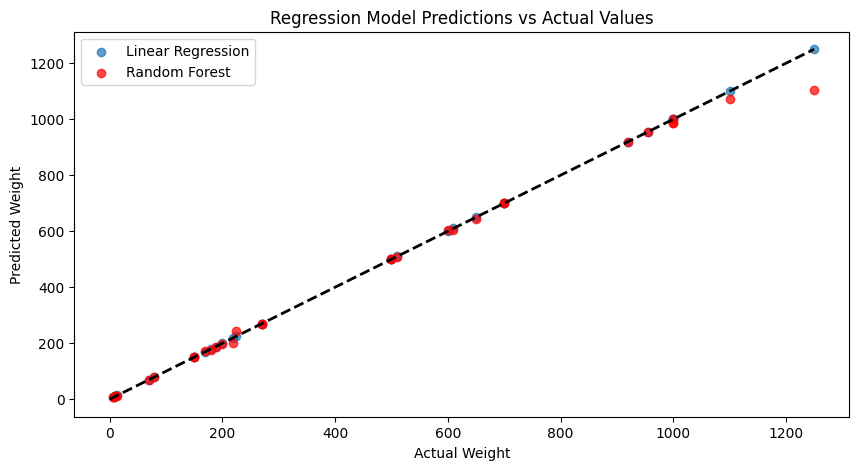

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df.drop(columns=["Length1", "Length2", "Length3", "Height", "Width"])
y = df["Weight"]

# One-hot encode categorical 'Species' column
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_species = encoder.fit_transform(X[['Species']])

# Convert to DataFrame and drop original column
species_df = pd.DataFrame(X_species, columns=encoder.get_feature_names_out(['Species']))
X = X.drop(columns=["Species"]).reset_index(drop=True)
X = pd.concat([X, species_df], axis=1)

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluate models
def evaluate_model(name, y_true, y_pred):
    print(f"{name} Model Performance:")
    print(f"R² Score: {r2_score(y_true, y_pred):.4f}")
    print(f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}\n")

evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)

# Plot predictions
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.7)
plt.scatter(y_test, y_pred_rf, label='Random Forest', alpha=0.7, color='red')
plt.plot([0, max(y_test)], [0, max(y_test)], 'k--', lw=2)
plt.xlabel("Actual Weight")
plt.ylabel("Predicted Weight")
plt.legend()
plt.title("Regression Model Predictions vs Actual Values")
plt.show()

In [5]:
import pickle

model = rf_model

# Assuming 'model' is your trained model
with open('fish_market_model.pkl', 'wb') as file:
    pickle.dump(model, file)